In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

data = torch.from_numpy(np.loadtxt("../data/age_data_3.txt")).to(torch.float32)
inputs, targets = data.T

# Camada linear do Pytorch

In [30]:
model = nn.Linear(in_features=1, out_features=1)
inputs = inputs.reshape(len(inputs), 1)
targets = targets.reshape(len(targets), 1)


In [32]:
with torch.no_grad():
    scores = model(inputs)

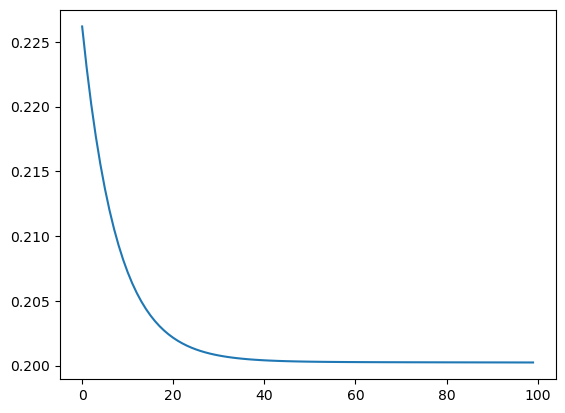

In [39]:
def train(model, inputs, targets, lr, num_epochs):
    loss_func = nn.BCEWithLogitsLoss()
    optim = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []
    
    for epoch in range(num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        
        losses.append(loss.item())
        
    return losses

with torch.no_grad():
    model.weight[:] = 19.
    model.bias[:] = -25.

losses = train(model, inputs, targets, lr=0.3, num_epochs=100)
plt.plot(losses)